# Project - An analysis of NBA players in the 2021/2022 season

These are the objectives of the project:
- Usage of an API to create a dataset with Python and Pandas
- Cleanup of a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset will have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

We are going to use the following API to get the data:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.

In [ ]:
# Instalation of library for making APIs calls to the NBA Web page (https://www.nba.com/stats/)
!pip install nba_api

!pip install unidecode
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from time import sleep
from unidecode import unidecode

In [ ]:
from nba_api.stats.endpoints import commonallplayers

def get_and_save_players_list():
    ''' Return a DataFrame of the players of the 2021-22 season with the following 
    columns = ["PERSON_ID", "PLAYER_NAME", "TEAM_NAME"] '''

    # API call with parameter of the '2021-22' season
    players = commonallplayers.CommonAllPlayers(season="2021-22")
    players_df = players.get_data_frames()[0]

    players_df = players_df.drop(players_df[players_df.TEAM_ID == 0].index)
    players_df = players_df.drop(players_df[players_df.GAMES_PLAYED_FLAG == "N"].index)
    players_df = players_df.drop(players_df[players_df.PERSON_ID == 1630597].index)

    players_df = players_df[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_NAME"]]
    players_df.columns=["PERSON_ID", "PLAYER_NAME", "TEAM_NAME"]

    return players_df

In [ ]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv", index=False)

In [ ]:
from nba_api.stats.endpoints import commonplayerinfo

def get_players_personal_information(current_players_list):
    ''' Return a DataFrame of the players in 'current_players_list' DataFrame
    with personal information about them.
    Columns of the df = ["PERSON_ID", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY",
                         "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"] '''

    players_df2 = pd.DataFrame([])

    for player_ID in current_players_list["PERSON_ID"]:
        try:
            # API call, the most common error is TimeOut after 30 seg.
            player_info = commonplayerinfo.CommonPlayerInfo(player_ID)
        except Exception as err:
            print(f"Error with PERSON_ID = {player_ID}, error = {err}")
            break

        personal_info = player_info.get_data_frames()[0]
        personal_info = personal_info[["PERSON_ID", "POSITION", "HEIGHT",
                                       "WEIGHT", "COUNTRY", "BIRTHDATE",
                                       "SEASON_EXP", "DRAFT_NUMBER"]]

        players_df2 = pd.concat([players_df2, personal_info])

        # Wait an amount of time to prevent the page shutting down the IP for further API call. 
        sleep(0.3)

    return players_df2

In [ ]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv", index=False)

In [ ]:
from nba_api.stats.endpoints import playercareerstats

def get_players_career_stats(current_players_list):
    ''' Return a DataFrame of the players in 'current_players_list' DataFrame
    with career statistics about them.
    Columns of the df = ["PERSON_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"] '''

    players_df3 = pd.DataFrame([])

    for player_ID in current_players_list["PERSON_ID"]:
        try:
            # API call, the most common error is TimeOut after 30 seg.
            player_info = playercareerstats.PlayerCareerStats(per_mode36="PerGame", player_id=player_ID)
        except Exception as err:
            print(f"Error with PERSON_ID = {player_ID}, error = {err}")
            break

        stats_info = player_info.get_data_frames()[1]
        stats_info = stats_info[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]
        stats_info.rename(columns={"PLAYER_ID":"PERSON_ID"}, inplace=True)

        players_df3 = pd.concat([players_df3, stats_info])
        
        # Wait an amount of time to prevent the page shutting down the IP for further API call. 
        sleep(0.3)

    return players_df3

In [ ]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv", index=False)

In [ ]:
from nba_api.stats.endpoints import playerprofilev2

def get_players_next_game(current_players_list):
    ''' Return a DataFrame of the players in 'current_players_list' DataFrame
    with the corresponding next game for each player.
    Columns of the df = ["PERSON_ID", "GAME_DATE"] '''

    players_df4 = pd.DataFrame([])

    for player_ID in current_players_list["PERSON_ID"]:
        try:
            # API call, the most common error is TimeOut after 30 seg.
            player_info = playerprofilev2.PlayerProfileV2(player_ID)
        except Exception as err:
            print(f"Error with PERSON_ID = {player_ID}, error = {err}")
            continue

        next_game = player_info.next_game.get_dict()
        next_game = pd.DataFrame(data=next_game['data'], columns=next_game['headers'])
        next_game["PERSON_ID"] = player_ID
        next_game = next_game[["PERSON_ID", "GAME_DATE"]]

        players_df4 = pd.concat([players_df4, next_game])
        
        # Wait an amount of time to prevent the page shutting down the IP for further API call. 
        sleep(0.3)

    return players_df4

In [ ]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv", index=False)

In [ ]:
def get_nba_players_salaries(csv_file_path=None):
    ''' Return a DataFrame of the players in 'current_players_list' DataFrame
    with the corresponding contract value for the '2021-22' season for each player.
    The information comes from an unofficial web site where not every player has
    information about its contract.
    Columns of the df = ["PERSON_ID", "2021-22"] '''

    if csv_file_path == None:
        # Collect the raw data of NBA players contracts. 
        contracts = pd.read_html("https://www.basketball-reference.com/contracts/players.html")[0]
        contracts = contracts.droplevel(0, axis=1)
        contracts = contracts[["Player", "2021-22"]]
        contracts.to_csv("contracts.csv", index=False)
    else:
        # Alternative the csv could be readed from a file.
        # The csv has been uploaded to GitHub (updated up to 25/04/2022):
        # csv_file_path = "https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/contracts.csv"
        contracts = pd.read_csv(csv_file_path)

    contracts.rename(columns={"Player":"PLAYER_NAME"}, inplace=True)
    contracts = contracts[contracts["PLAYER_NAME"].notnull()]
    contracts = contracts[contracts["2021-22"].notnull()]
    contracts = contracts[contracts["PLAYER_NAME"]!="Player"]

    contracts["PLAYER_NAME"] = contracts["PLAYER_NAME"].apply(lambda s: unidecode(s)).str.strip(" .")
    contracts["PLAYER_NAME"] = contracts["PLAYER_NAME"].str.replace("Kevin Knox", "Kevin Knox II")
    contracts["PLAYER_NAME"] = contracts["PLAYER_NAME"].str.replace("Marcus Morris", "Marcus Morris Sr.")
    contracts["PLAYER_NAME"] = contracts["PLAYER_NAME"].str.replace("Xavier Tillman Sr", "Xavier Tillman")
    contracts["PLAYER_NAME"] = contracts["PLAYER_NAME"].str.replace("Robert Williams", "Robert Williams III")
    contracts = contracts.drop_duplicates()
    current_players_list["PLAYER_NAME"] = current_players_list["PLAYER_NAME"].str.strip()

    players_df5 = pd.merge(current_players_list, contracts, on="PLAYER_NAME", how="left")
    players_df5.rename(columns={"2021-22":"SALARY"}, inplace=True)
    players_df5 = players_df5[["PERSON_ID", "SALARY"]]

    return players_df5

In [ ]:
players_salaries = get_nba_players_salaries()
players_salaries.to_csv("nba_players_salary.csv", index=False)

In [ ]:
def merge_dataframes(*args):
    ''' Function that merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries
    And saves the result to a csv called "raw_nba_players_dataset.csv"
    '''
    players_df6 = pd.DataFrame([])

    for dataframe in args:
        if players_df6.empty == True:
            players_df6 = dataframe
        else:
            players_df6 = pd.merge(players_df6, dataframe, on="PERSON_ID", how="left")
    return players_df6

In [ ]:
# For practical purposes below there are read_scv lines linked to CSV on the web (updated up to 25/04/2022).
# current_players_list = pd.read_csv("https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/nba_current_players_list.csv")
# players_personal_info = pd.read_csv("https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/nba_players_personal_info.csv")
# players_career_stats = pd.read_csv("https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/nba_players_career_stats.csv")
# players_next_game = pd.read_csv("https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/nba_players_next_game.csv")
# players_salaries = pd.read_csv("https://raw.githubusercontent.com/tadeo-ottonello/CSV/main/nba_players_salary.csv")

raw_players_dataset = merge_dataframes(current_players_list, players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv", index=False)

## Data Cleaning and Preprocessing

In [ ]:
def copy_and_delete_nan(players_dataset):
    players_dataset.dropna(axis=0, subset=["SALARY"], inplace=True)

    return players_dataset

In [ ]:
working_df = copy_and_delete_nan(raw_players_dataset)

In [ ]:
def cast_columns(working_df):
    '''Casting Salary, Birthday and Game Date columns to its corresponding type (int, datetime)'''
    if working_df["SALARY"].dtypes != "int64":
        working_df["SALARY"] = working_df["SALARY"].str.replace(",", "").str.replace("$", "").str.strip()
        working_df["SALARY"] = working_df["SALARY"].astype(int)

    working_df["BIRTHDATE"] = pd.to_datetime(working_df["BIRTHDATE"])
    
    working_df["GAME_DATE"] = pd.to_datetime(working_df["GAME_DATE"])

In [ ]:
cast_columns(working_df)

In [ ]:
def convert_height_column(working_df):
    '''Function that converts the height column from height in feet and inches to centimeters'''
    if working_df["HEIGHT"].dtype == "object":
        feets = working_df["HEIGHT"].str.split("-").str[0].astype(float) * 12 * 2.54
        inches = working_df["HEIGHT"].str.split("-").str[1].astype(float) * 2.54

        working_df["HEIGHT"] = feets + inches
        working_df["HEIGHT"] = working_df["HEIGHT"].astype(int)

In [ ]:
convert_height_column(working_df)

In [ ]:
def convert_weight_column(working_df):
    '''Function that converts the weight column from pounds to kilograms'''
    working_df["WEIGHT"] = working_df["WEIGHT"].astype(float)
    working_df["WEIGHT"] = working_df["WEIGHT"] * 0.453592
    working_df["WEIGHT"] = working_df["WEIGHT"].astype(int)

In [ ]:
convert_weight_column(working_df)

In [ ]:
from dateutil.relativedelta import relativedelta
import datetime

def delta_time(birthdate):
    today = datetime.datetime.today()
    delta = relativedelta(today, birthdate)
    age_text = "{0} years, {1} months, {2} days".format(delta.years, delta.months, delta.days)
    return age_text

def add_age_column(working_df):
    ''' Function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" '''
    working_df["AGE"] = working_df["BIRTHDATE"].apply(lambda s: delta_time(s))

In [ ]:
add_age_column(working_df)

In [ ]:
def update_position(working_df):
    ''' Function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.'''
    working_df["POSITION"] = working_df["POSITION"].str.split("-").str[0]

In [ ]:
update_position(working_df)

In [ ]:
working_df.set_index("PERSON_ID", drop=True, inplace=True)

working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].replace("Undrafted", np.nan)
working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].astype(float)
working_df["DRAFT_NUMBER"] = working_df["DRAFT_NUMBER"].astype("Int64")

working_df.to_csv("nba_players_processed_dataset.csv")

In [ ]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

In [ ]:
n_players = working_df.shape[0]
print("Total number of players:", n_players, "\n")

usa_players = working_df["COUNTRY"].value_counts()["USA"]
print("Number of USA born players", usa_players)

foreign_players = working_df[working_df["COUNTRY"] != "USA"].shape[0]
print("Number of foreign players", foreign_players, "\n")

players_per_position = working_df.groupby(["POSITION"])["POSITION"].count()
print("Number of players per position:")
for position, n_players in players_per_position.iteritems():
    print(position.ljust(10), "\t", n_players)

players_per_team = working_df.groupby(["TEAM_NAME"])["TEAM_NAME"].count()
print("\n","Number of players per team:", sep="")
for team, n_players in players_per_team.iteritems():
    print(team.ljust(10), "\t", n_players)

rookies = working_df[working_df["SEASON_EXP"] == 0].shape[0]
print("\nNumber of rookies players:", rookies, "\n")

Total number of players: 433 

Number of USA born players 325
Number of foreign players 108 

Number of players per position:
Center     	 59
Forward    	 169
Guard      	 205

Number of players per team:
76ers      	 15
Bucks      	 15
Bulls      	 13
Cavaliers  	 15
Celtics    	 14
Clippers   	 13
Grizzlies  	 15
Hawks      	 15
Heat       	 15
Hornets    	 14
Jazz       	 14
Kings      	 15
Knicks     	 15
Lakers     	 15
Magic      	 14
Mavericks  	 14
Nets       	 15
Nuggets    	 13
Pacers     	 14
Pelicans   	 14
Pistons    	 15
Raptors    	 14
Rockets    	 13
Spurs      	 16
Suns       	 15
Thunder    	 15
Timberwolves 	 15
Trail Blazers 	 15
Warriors   	 14
Wizards    	 14

Number of rookies players: 58 



In [ ]:
def delta_time_2(birthdate):
    today = datetime.datetime.today()
    delta_years = relativedelta(today, birthdate).years
    delta_days = today - (birthdate + relativedelta(years=delta_years))
    age = [delta_years, delta_days.days]
    return age

working_df["AGE_YEARS"] = working_df["BIRTHDATE"].apply(lambda s: delta_time_2(s)[0])
working_df["AGE_DAYS"] = working_df["BIRTHDATE"].apply(lambda s: delta_time_2(s)[1])

print("The average age is {:.2f} years.".format(working_df["AGE_YEARS"].mean()))

min_years = working_df["AGE_YEARS"].min()
min_days = working_df[working_df["AGE_YEARS"] == working_df["AGE_YEARS"].min()]["AGE_DAYS"].min()
print("The youngest player age is {0} years and {1} days".format(min_years, min_days))

max_years = working_df["AGE_YEARS"].max()
max_days = working_df[working_df["AGE_YEARS"] == working_df["AGE_YEARS"].max()]["AGE_DAYS"].max()
print("The youngest player age is {0} years and {1} days".format(max_years, max_days))

min_height = working_df["HEIGHT"].min()
max_height = working_df["HEIGHT"].max()
print(f"The maximun height among players is {max_height} and the minimun height is {min_height}.")

players_per_position_avg = working_df.groupby(["POSITION"]).mean()["HEIGHT"]
print("\nAverage height of players per position:")
for position, avg_height in players_per_position_avg.iteritems():
    print("{}\t{:.2f} cm.".format(position.ljust(10), avg_height))    

The average age is 26.27 years.
The youngest player age is 19 years and 123 days
The youngest player age is 41 years and 321 days
The maximun height among players is 220 and the minimun height is 175.

Average height of players per position:
Center    	210.31 cm.
Forward   	202.56 cm.
Guard     	192.00 cm.


In [ ]:
min_salary = working_df["SALARY"].min()
max_salary = working_df["SALARY"].max()
print(f"The minimun salary of the NBA is U$S {min_salary} and the maximun salary is U$S {max_salary:,}")

mean_salary = working_df["SALARY"].mean()
median_salary = working_df["SALARY"].median()
print("The Mean salary of all players is U$S {0:,} and the Mean and Median salary is U$S {1:,}".format(round(mean_salary), int(median_salary)))

The minimun salary of the NBA is U$S 5318 and the maximun salary is U$S 45,780,966
The Mean salary of all players is U$S 8,796,447 and the Mean and Median salary is U$S 4,373,160


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

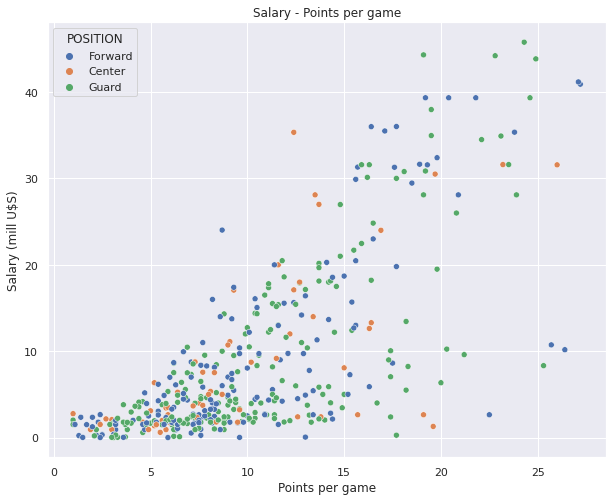

In [ ]:
working_df["SALARY"] = working_df["SALARY"]/1000000

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 8]
sns.scatterplot(x="PTS", y="SALARY" , hue="POSITION", data=working_df).set(title="Salary - Points per game", xlabel="Points per game", ylabel="Salary (mill U$S)")
plt.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

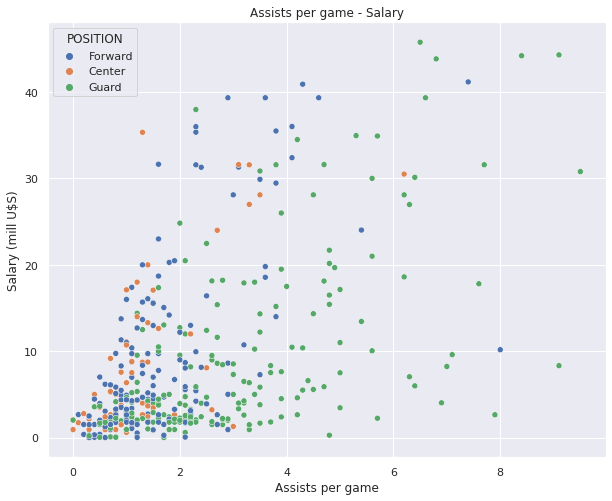

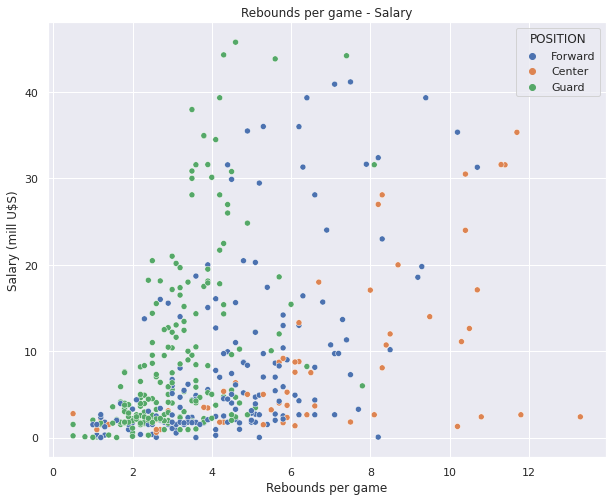

In [ ]:
sns.scatterplot(x="AST", y="SALARY" , hue="POSITION", data=working_df).set(title="Assists per game - Salary", xlabel="Assists per game", ylabel="Salary (mill U$S)")
plt.show()

sns.scatterplot(x="REB", y="SALARY" , hue="POSITION", data=working_df).set(title="Rebounds per game - Salary", xlabel="Rebounds per game", ylabel="Salary (mill U$S)")
plt.show()

When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

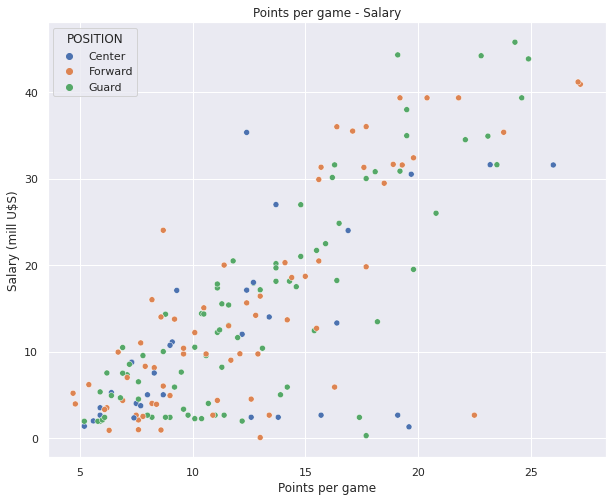

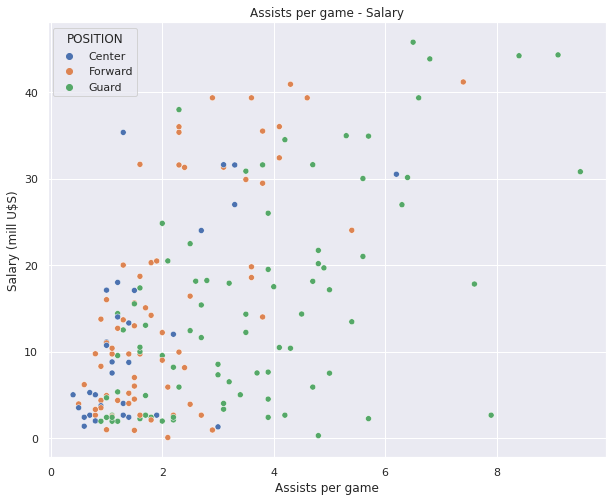

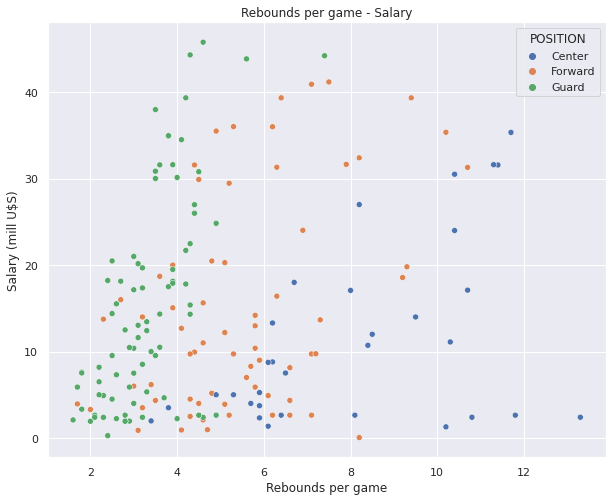

In [ ]:
mod_working_df = working_df[working_df["SEASON_EXP"] > 4][["SALARY", "PTS", "AST", "REB", "POSITION"]]

sns.scatterplot(x="PTS", y="SALARY" , hue="POSITION", data=mod_working_df).set(title="Points per game - Salary", xlabel="Points per game", ylabel="Salary (mill U$S)")
plt.show()

sns.scatterplot(x="AST", y="SALARY" , hue="POSITION", data=mod_working_df).set(title="Assists per game - Salary", xlabel="Assists per game", ylabel="Salary (mill U$S)")
plt.show()

sns.scatterplot(x="REB", y="SALARY" , hue="POSITION", data=mod_working_df).set(title="Rebounds per game - Salary", xlabel="Rebounds per game", ylabel="Salary (mill U$S)")
plt.show()

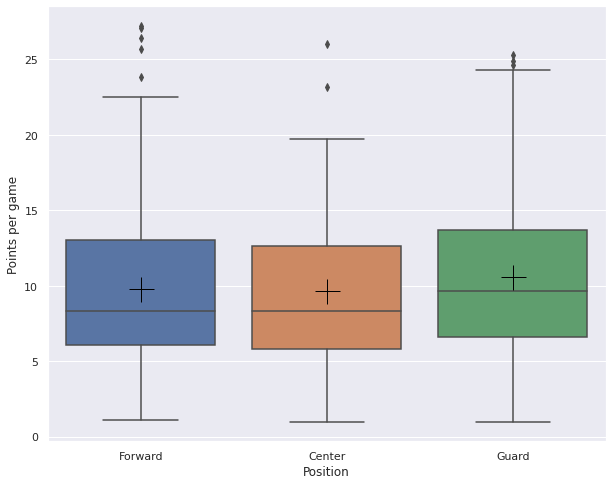

Forward points per game:
count    169.000000
mean       9.783432
std        5.531304
min        1.100000
25%        6.100000
50%        8.300000
75%       13.000000
max       27.200000
Name: PTS, dtype: float64

Center points per game:
count    59.000000
mean      9.645763
std       5.365577
min       1.000000
25%       5.800000
50%       8.300000
75%      12.650000
max      26.000000
Name: PTS, dtype: float64

Guard points per game:
count    204.000000
mean      10.569608
std        5.359018
min        1.000000
25%        6.575000
50%        9.650000
75%       13.700000
max       25.300000
Name: PTS, dtype: float64


In [ ]:
sns.boxplot(data=working_df, x="POSITION", y="PTS",
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "25"}).set(xlabel="Position", ylabel="Points per game")
plt.show()

print("Forward points per game:\n", working_df[working_df["POSITION"]=="Forward"]["PTS"].describe(), "\n", sep="")
print("Center points per game:\n", working_df[working_df["POSITION"]=="Center"]["PTS"].describe(), "\n", sep="")
print("Guard points per game:\n", working_df[working_df["POSITION"]=="Guard"]["PTS"].describe(), sep="")

6- Plot the Height distribution of all players

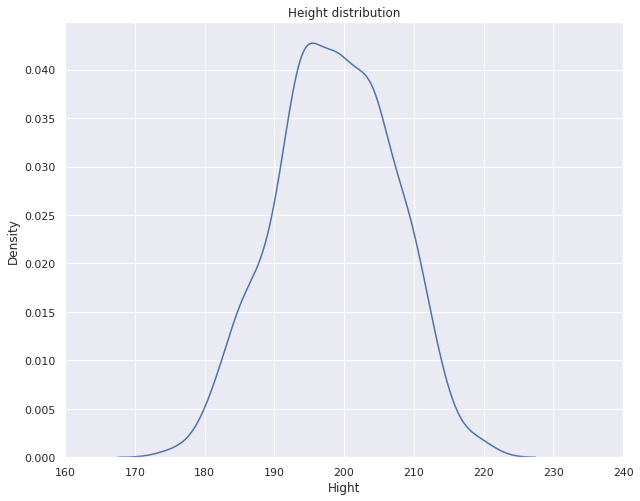

In [ ]:
sns.kdeplot(data=working_df, x="HEIGHT").set(title="Height distribution", xlabel="Hight")
plt.xticks(range(160, 241, 10))
plt.show()

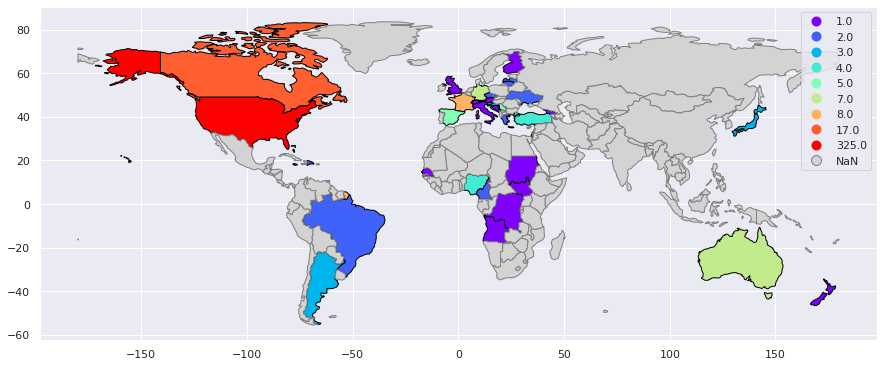

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

players_per_country = pd.DataFrame(working_df.groupby("COUNTRY")["COUNTRY"].count())
players_per_country = pd.DataFrame(players_per_country, columns=["COUNTRY"])
players_per_country["name"] = players_per_country.index

players_per_country["name"] = players_per_country["name"].str.replace("Bosnia and Herzegovina", "Bosnia and Herz.")
players_per_country["name"] = players_per_country["name"].str.replace("Dominican Republic", "Dominican Rep.")
players_per_country["name"] = players_per_country["name"].str.replace("DRC", "Dem. Rep. Congo")
players_per_country["name"] = players_per_country["name"].str.replace("Czech Republic", "Czechia")
players_per_country["name"] = players_per_country["name"].str.replace("Republic of the Congo", "Dem. Rep. Congo")
players_per_country["name"] = players_per_country["name"].str.replace("South Sudan", "S. Sudan")
players_per_country["name"] = players_per_country["name"].str.replace("USA", "United States of America")

world = pd.merge(world, players_per_country, on="name", how="outer")


fig, ax = plt.subplots(1, 1, figsize=(15, 15))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.plot(ax=ax, column = 'COUNTRY', cmap = 'rainbow', 
           edgecolor='black', 
           categorical = True,
           legend=True, missing_kwds={"color": "lightgrey", "edgecolor": "grey", "hatch": ""})